In [5]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm import factorize

def get_from_dict(d, values, sep=","):
    return [d[i.strip()] for i in values.split(sep)]

def test_trapezoid(n_samples, topwidth=1, basewidth=1, seed=255):
    np.random.seed(seed)
    epsilon = (basewidth - topwidth)/2
    intriangles = np.random.rand(n_samples) <= epsilon / (1 + epsilon)
    n_triangles_points =  np.count_nonzero(intriangles)
    n_rectangle_points = n_samples - n_triangles_points
    rectangle_points = np.random.rand(n_rectangle_points, 2)
    rectangle_points[:, 0] -= .5
    triangles_points = np.random.rand(n_triangles_points, 2)
    in_first_triangle = triangles_points[:, 0] <= (1 - triangles_points[:, 1])
    triangles_points[:, 0] *= epsilon
    triangles_points[in_first_triangle, 0]+= .5
    triangles_points[~in_first_triangle, 1] = 1 - triangles_points[~in_first_triangle][:, 1]
    triangles_points[~in_first_triangle, 0] -= epsilon + .5
    samples = np.empty((n_samples, 2))
    samples[intriangles] = triangles_points
    samples[~intriangles] = rectangle_points
    return samples

[==================  ] 90%
Manifolds...
Manifold #1 [ 1  4  8 12 14 20 29 40 50 61 73 86]
Manifold #2 [ 2  5  9 11 13 19 28 41 49 60 72]
[==================  ] 90%
Manifolds...
Manifold #1 [ 1  3  4  8 13 19 24 26 32 35 41 46 50 61 74]
Manifold #2 [ 2  5  9 14 22 31 40 42 51 62]
[==================  ] 90%
Manifolds...
Manifold #1 [ 1  4  8 13 23 33 39 41 61 73]
Manifold #2 [ 2  5  9 15 19 24 26 42 58 67]
[==================  ] 90%
Manifolds...
Manifold #1 [ 1  2 17 23 31 38 57]
Manifold #2 [ 3  4  5  6 18 25 33 36]
[==================  ] 90%
Manifolds...
Manifold #1 [1 7]
Manifold #2 [ 2  3  6 85]
[==================  ] 90%
Manifolds...
Manifold #1 [ 1  3  9 14]
Manifold #2 [2 5]


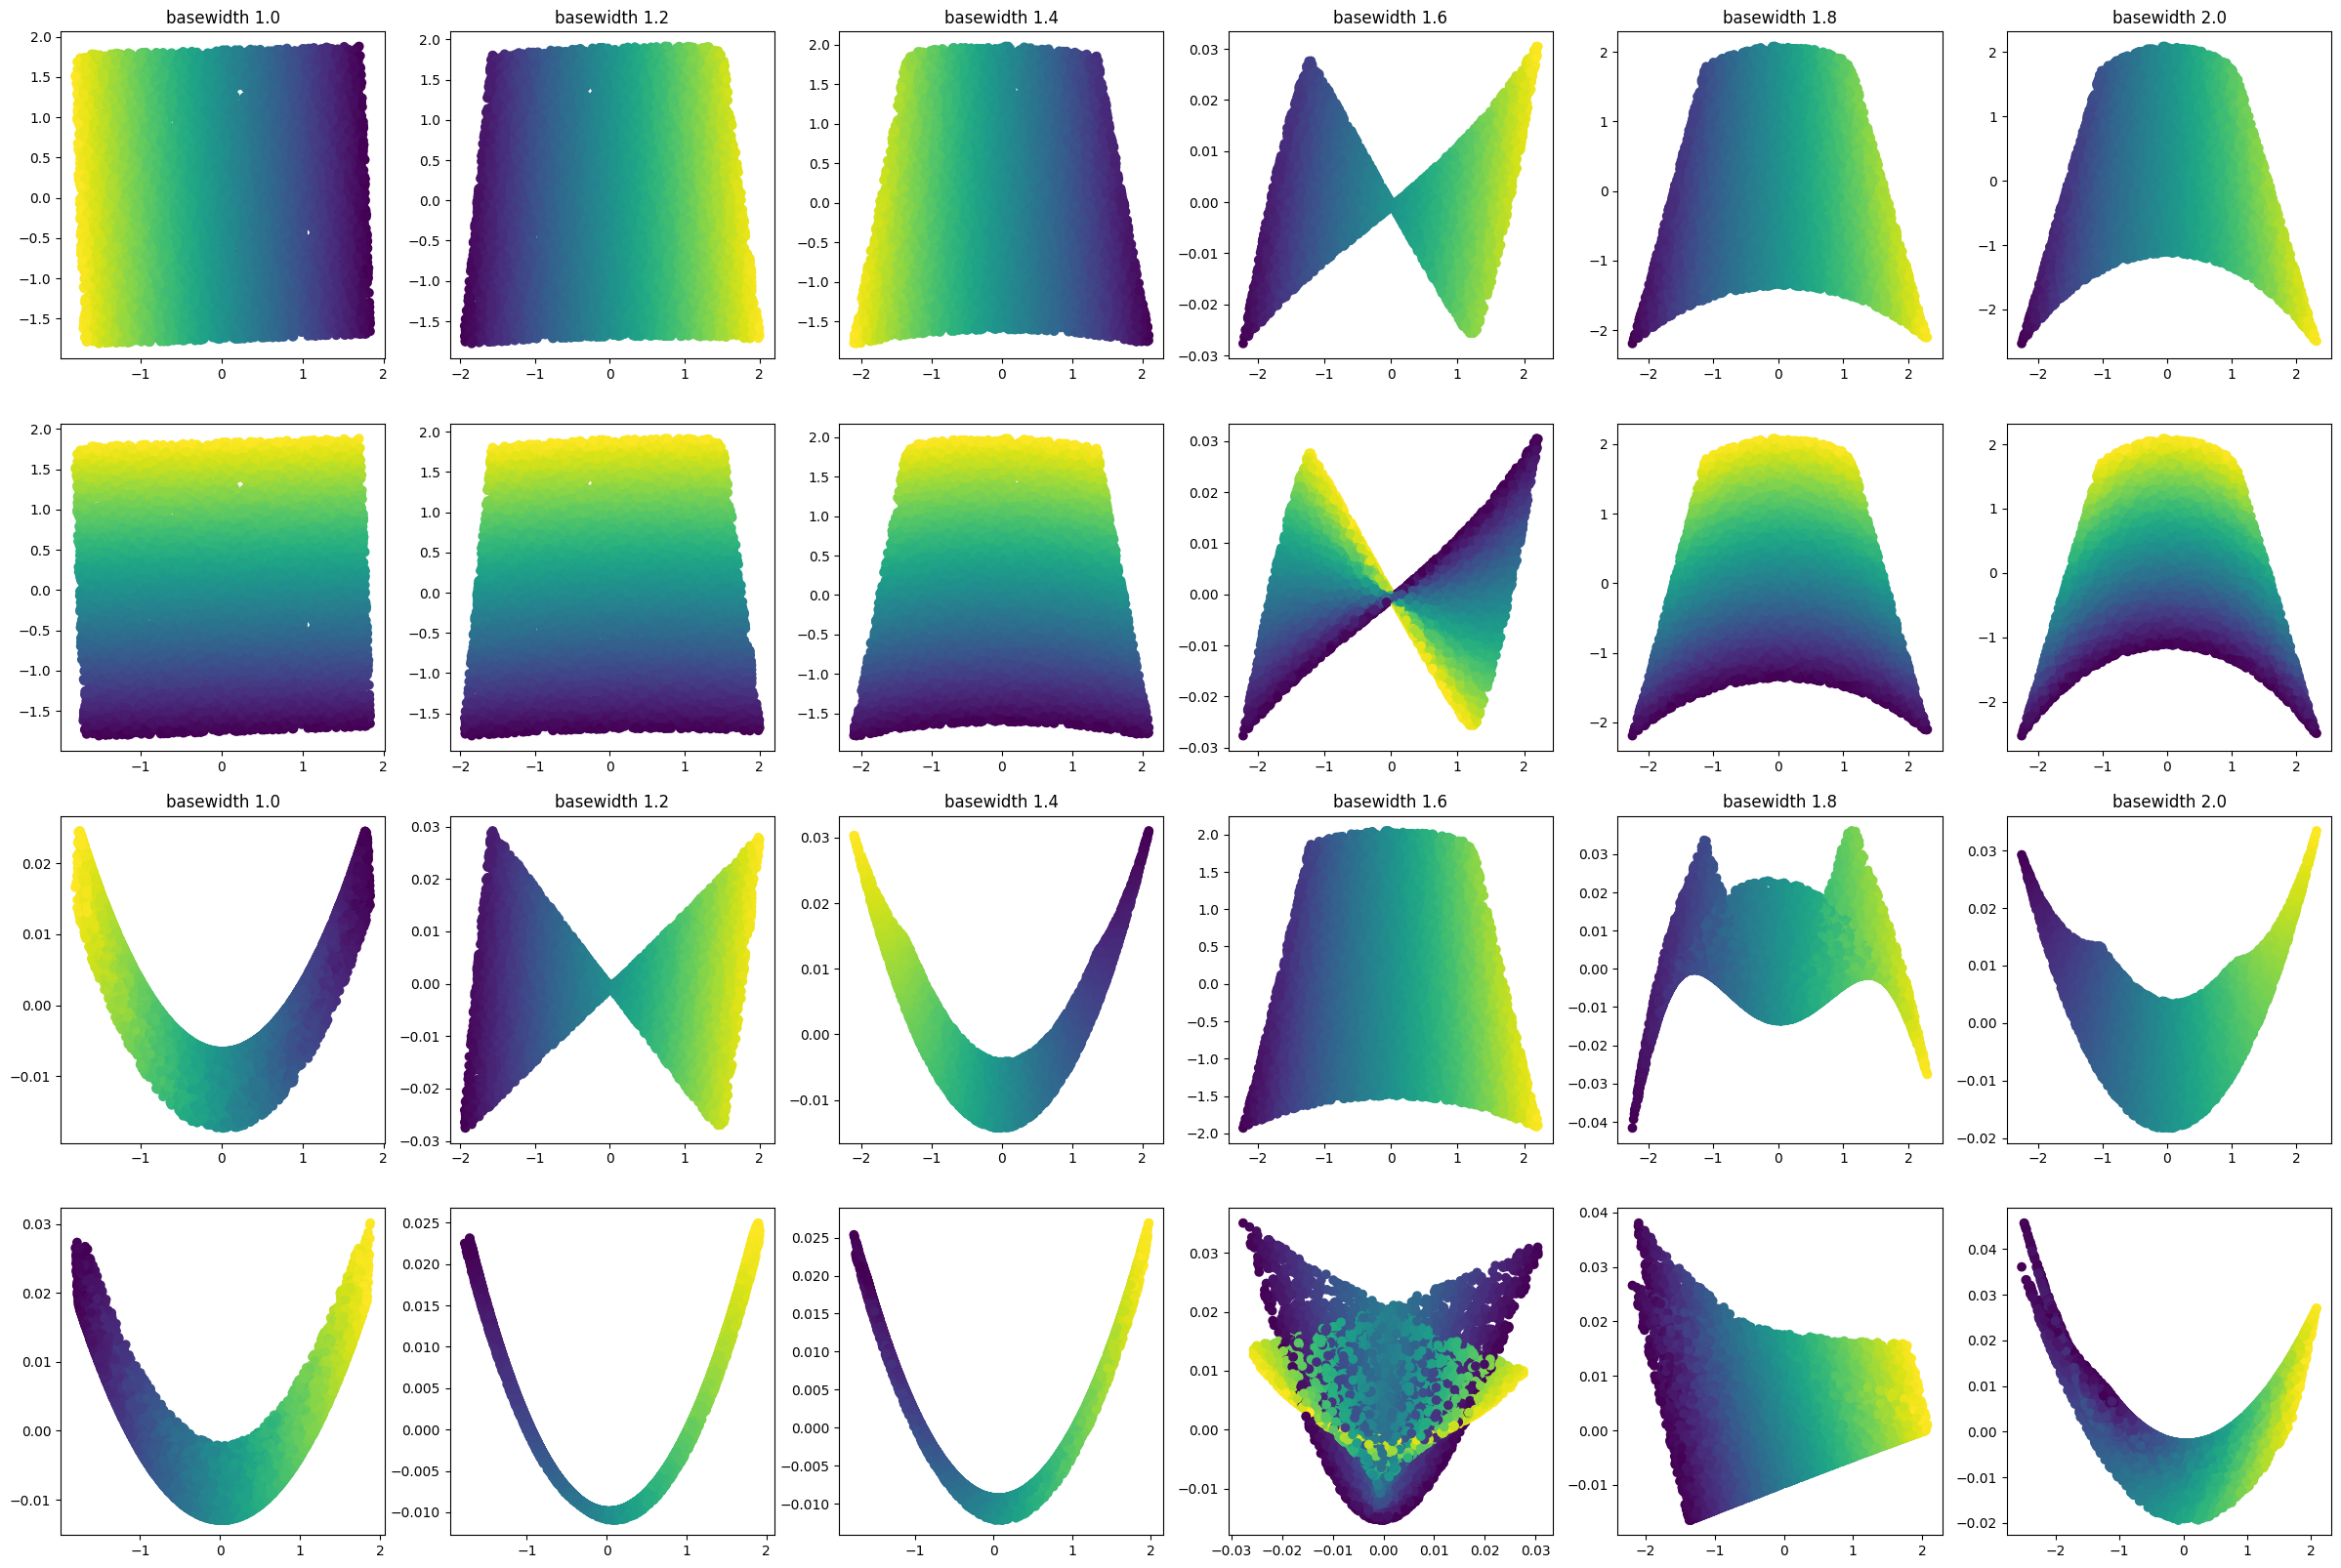

In [11]:
plot, axes = plt.subplots(4,6,figsize=(30, 20))
for i in range(6):
    basewidth = 1+0.2*i
    samples = test_trapezoid(10000, basewidth = basewidth)
    results = factorize(data=samples, sigma=0.5, n_eigenvectors=100, n_factors=2, eig_crit = 2.0,
    sim_crit = 0.6, seed=255)
    data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
        get_from_dict(results, "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")
    axes[0,i].title.set_text('basewidth ' + str(1+0.2*i))
    axes[0,i].scatter(phi[:, manifolds[0][0]], phi[:, manifolds[1][0]], c=data[:,0])
    axes[1,i].scatter(phi[:, manifolds[0][0]], phi[:, manifolds[1][0]], c=data[:,1])
    axes[2,i].title.set_text('basewidth ' + str(1+0.2*i))
    axes[2,i].scatter(phi[:, manifolds[0][0]], phi[:, manifolds[0][1]], c=data[:,0])
    axes[3,i].scatter(phi[:, manifolds[1][0]], phi[:, manifolds[1][1]], c=data[:,1])